In [1]:
import pandas as pd
import numpy as np 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
x=pd.read_csv("Dataset_(Task-1).csv")

In [2]:
x.head()

,"Flow Depth, D [m]",SLOPE,CHARGE,"Channel Width, B [m]","Particle size, d [m]",Bed Form
0,5.09,0.000204,34721.4,306.0,0.000978,2
1,5.09,0.000098,15114.2,261.0,0.000978,2
2,4.89,0.000077,7200.2,258.0,0.000978,2
3,4.79,0.000066,5243.3,257.0,0.000978,2
4,3.54,0.000348,125324.7,449.2,0.000978,2


In [17]:
x.isnull().sum()

Flow Depth, D [m]       0
SLOPE                   0
CHARGE                  0
Channel Width, B [m]    0
Particle size, d [m]    0
Bed Form                0
dtype: int64

In [8]:
x=x.dropna()

In [9]:
x.isnull().sum()
x.isnull().sum().sum()

0

In [12]:
print(x.describe())

       Flow Depth, D [m]         SLOPE  Channel Width, B [m]  \
count        2548.000000  2.548000e+03           2548.000000   
mean            2.718144  5.570980e-04            214.912591   
std             1.794157  6.710274e-04            100.474557   
min             0.080000  5.600000e-09             16.580000   
25%             1.570000  1.799794e-04            157.278756   
50%             2.265822  4.338693e-04            190.683166   
75%             3.492500  8.627090e-04            269.250000   
max            11.000000  2.209983e-02            625.500000   

       Particle size, d [m]     Bed Form  
count           2548.000000  2548.000000  
mean               0.011168     2.043171  
std                0.023022     0.230439  
min                0.000260     2.000000  
25%                0.001112     2.000000  
50%                0.002840     2.000000  
75%                0.013188     2.000000  
max                0.177230     6.000000  


In [20]:
target = "Bed Form"
y=x[target]
print("\nClass Distribution:")
print(x[target].value_counts())


Class Distribution:
Bed Form
2    2447
3      97
5       3
6       1
Name: count, dtype: int64


In [31]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=42)
mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)
mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, random_state=42)

In [32]:
y_pred = mlp.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9490196078431372


In [33]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=42)
mlp = MLPClassifier(
    hidden_layer_sizes=(50,30),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)
mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=300, random_state=42)

In [34]:
y_pred = mlp.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9647058823529412


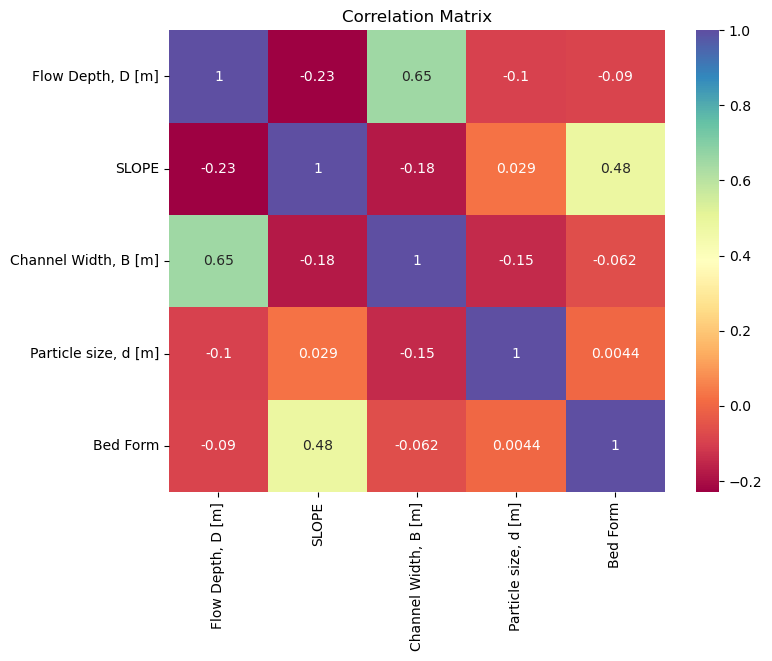

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(x.corr(numeric_only=True), annot=True, cmap="Spectral")
plt.title("Correlation Matrix")
plt.show()

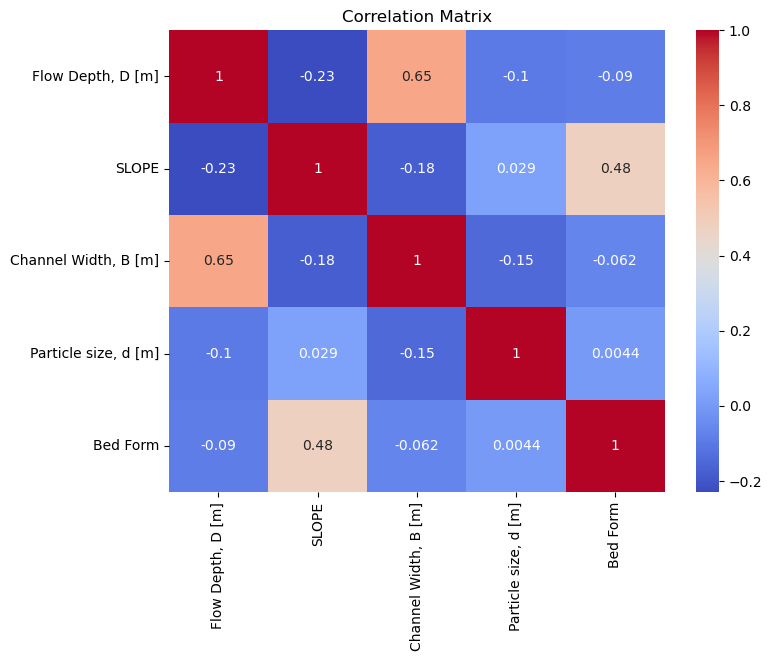

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(x.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()